In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn import metrics

In [41]:
cnbv_raw = pd.read_csv ('C:/Users/grace/Documents/Machine Learning/CNBV_perdida_esperada_2.csv', dtype={'Cartera_Total': np.float64})
cnbv_raw.head()

,Escala,Estado_calculado,Actividad_economica_agragada,Destino_del_credito,Institucion,Periodo_seguimiento,Cartera,Cartera_Total,Cartera_Vigente,Cartera_Vencida,IMOR,Creditos,Acreditados
0,Montos expresados en : Millones de pesos,AGUASCALIENTES,"Agricultura, Silvicultura, Ganaderia y Pesca",Adquisicion de Activo Fijo: Inmuebles,ABC Capital,2016-06,Empresas,0.0,0.0,0.0,0.0,NaN,NaN
1,Montos expresados en : Millones de pesos,AGUASCALIENTES,"Agricultura, Silvicultura, Ganaderia y Pesca",Adquisicion de Activo Fijo: Inmuebles,Accendo Banco,2016-06,Empresas,0.0,0.0,0.0,0.0,NaN,NaN
2,Montos expresados en : Millones de pesos,AGUASCALIENTES,"Agricultura, Silvicultura, Ganaderia y Pesca",Adquisicion de Activo Fijo: Inmuebles,Actinver,2016-06,Empresas,0.0,0.0,0.0,0.0,NaN,NaN
3,Montos expresados en : Millones de pesos,AGUASCALIENTES,"Agricultura, Silvicultura, Ganaderia y Pesca",Adquisicion de Activo Fijo: Inmuebles,Afirme,2016-06,Empresas,0.0,0.0,0.0,0.0,NaN,NaN
4,Montos expresados en : Millones de pesos,AGUASCALIENTES,"Agricultura, Silvicultura, Ganaderia y Pesca",Adquisicion de Activo Fijo: Inmuebles,Autofin,2016-06,Empresas,0.0,0.0,0.0,0.0,NaN,NaN


In [42]:
cnbv_raw2 = cnbv_raw[cnbv_raw["Cartera_Total"] != 0]

In [43]:
cnbv_raw2

,Escala,Estado_calculado,Actividad_economica_agragada,Destino_del_credito,Institucion,Periodo_seguimiento,Cartera,Cartera_Total,Cartera_Vigente,Cartera_Vencida,IMOR,Creditos,Acreditados
6,Montos expresados en : Millones de pesos,AGUASCALIENTES,"Agricultura, Silvicultura, Ganaderia y Pesca",Adquisicion de Activo Fijo: Inmuebles,Banca Mifel,2016-06,Empresas,26.91,26.91,0.00,0.00,6.0,6.0
15,Montos expresados en : Millones de pesos,AGUASCALIENTES,"Agricultura, Silvicultura, Ganaderia y Pesca",Adquisicion de Activo Fijo: Inmuebles,Banorte,2016-06,Empresas,18.99,18.70,0.29,1.53,9.0,9.0
16,Montos expresados en : Millones de pesos,AGUASCALIENTES,"Agricultura, Silvicultura, Ganaderia y Pesca",Adquisicion de Activo Fijo: Inmuebles,Banregio,2016-06,Empresas,54.37,54.37,0.00,0.00,10.0,9.0
22,Montos expresados en : Millones de pesos,AGUASCALIENTES,"Agricultura, Silvicultura, Ganaderia y Pesca",Adquisicion de Activo Fijo: Inmuebles,HSBC,2016-06,Empresas,53.01,53.01,0.00,0.00,11.0,11.0
46,Montos expresados en : Millones de pesos,AGUASCALIENTES,"Agricultura, Silvicultura, Ganaderia y Pesca",Adquisicion de Activo Fijo: Mobiliario y Equipo,Banco del Bajío,2016-06,Empresas,157.47,157.47,0.00,0.00,30.0,30.0
51,Montos expresados en : Millones de pesos,AGUASCALIENTES,"Agricultura, Silvicultura, Ganaderia y Pesca",Adquisicion de Activo Fijo: Mobiliario y Equipo,Banorte,2016-06,Empresas,0.64,0.64,0.00,0.00,1.0,1.0
77,Montos expresados en : Millones de pesos,AGUASCALIENTES,"Agricultura, Silvicultura, Ganaderia y Pesca",Capital de Trabajo,Banamex,2016-06,Empresas,358.14,358.14,0.00,0.00,12.0,11.0
78,Montos expresados en : Millones de pesos,AGUASCALIENTES,"Agricultura, Silvicultura, Ganaderia y Pesca",Capital de Trabajo,Banca Mifel,2016-06,Empresas,12.88,12.88,0.00,0.00,5.0,5.0
82,Montos expresados en : Millones de pesos,AGUASCALIENTES,"Agricultura, Silvicultura, Ganaderia y Pesca",Capital de Trabajo,Banco del Bajío,2016-06,Empresas,155.51,155.51,0.00,0.00,50.0,49.0
86,Montos expresados en : Millones de pesos,AGUASCALIENTES,"Agricultura, Silvicultura, Ganaderia y Pesca",Capital de Trabajo,Bankaool,2016-06,Empresas,32.81,0.14,32.67,99.56,4.0,4.0


In [44]:
imor_r = pd.cut(np.array(cnbv_raw2['IMOR']), bins=2, labels=['Pago',  'Default'])

In [45]:
imor_pd= pd.DataFrame(imor_r)

In [46]:
le = preprocessing.LabelEncoder()

In [47]:
target = imor_r
target_encoded= le.fit_transform(target)
target_encoded.shape

(423068,)

In [48]:
cnbv= cnbv_raw2.drop(['IMOR', 'Cartera_Total', 'Cartera_Vigente', 'Cartera_Vencida', 'Escala', 'Periodo_seguimiento', 'Cartera', 'Creditos', 'Acreditados'], axis=1)

In [49]:
#x = cnbv['Cartera_Total'].str.replace(',', '').str.replace(')', '').str.replace('(', '')
#y = cnbv['Cartera_Vigente'].str.replace(',', '').str.replace(')', '').str.replace('(', '')  
#z = cnbv['Cartera_Vencida'].str.replace(',', '').str.replace(')', '').str.replace('(', '')  

In [50]:
#cnbv['Cartera_Total']= x.astype(float)
#cnbv['Cartera_Vigente']= y.astype(float)
#cnbv['Cartera_Vencida']= z.astype(float)

In [51]:
#cnbv['Cartera_Total'].dropna(inplace=True)
#cnbv['Cartera_Vigente'].dropna(inplace=True)
#cnbv['Cartera_Vencida'].dropna(inplace=True)
#cnbv['IMOR'].dropna(inplace=True)

In [52]:
state_encoded=le.fit_transform(cnbv['Estado_calculado'])
sector_encoded=le.fit_transform(cnbv['Actividad_economica_agragada'])
credit_encoded=le.fit_transform(cnbv['Destino_del_credito'])
bank_encoded=le.fit_transform(cnbv['Institucion'])

In [53]:
features= np.column_stack((state_encoded,sector_encoded, credit_encoded, bank_encoded))
features.shape

(423068, 4)

In [54]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(features, target_encoded, random_state=42, test_size=0.3) # 70% training and 30% test

In [55]:
#Create KNN Classifier
#knn = KNeighborsClassifier(n_neighbors=10)

#Train the model using the training sets
#knn.fit(X_train, y_train)

#Predict the response for test dataset
#y_pred = knn.predict(X_test)

In [56]:
# Model Accuracy, how often is the classifier correct?
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [57]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=42)

k: 1, Train/Test Score: 0.962/0.959
k: 3, Train/Test Score: 0.966/0.963
k: 5, Train/Test Score: 0.969/0.965
k: 7, Train/Test Score: 0.970/0.966
k: 9, Train/Test Score: 0.970/0.966
k: 11, Train/Test Score: 0.970/0.967
k: 13, Train/Test Score: 0.970/0.966
k: 15, Train/Test Score: 0.969/0.966
k: 17, Train/Test Score: 0.969/0.965
k: 19, Train/Test Score: 0.968/0.965


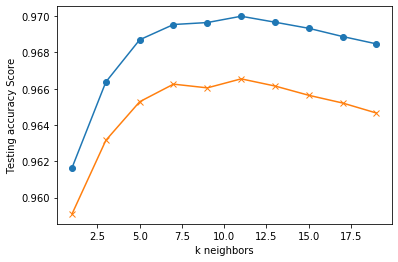

In [58]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [59]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=7)

#Train the model using the training sets
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [60]:
#Predict the response for test dataset
predictions = knn.predict(features)
nn= pd.DataFrame(predictions)

In [61]:
nn.shape

(423068, 1)

In [62]:
clusters_pd=cnbv_raw2[['Estado_calculado', 'Actividad_economica_agragada', 'Destino_del_credito','Institucion', 'IMOR']].copy()
clusters_pd["Clusters"]= nn[0]
clusters_pd["Label"]= imor_pd[0]
clusters_pd[clusters_pd.isnull().any(axis=1)].shape
clusters_pd.to_csv(r'C:/Users/grace/Documents/Machine Learning/pago_default.csv')
clusters_pd.head()

,Estado_calculado,Actividad_economica_agragada,Destino_del_credito,Institucion,IMOR,Clusters,Label
6,AGUASCALIENTES,"Agricultura, Silvicultura, Ganaderia y Pesca",Adquisicion de Activo Fijo: Inmuebles,Banca Mifel,0.00,1.0,Pago
15,AGUASCALIENTES,"Agricultura, Silvicultura, Ganaderia y Pesca",Adquisicion de Activo Fijo: Inmuebles,Banorte,1.53,1.0,Pago
16,AGUASCALIENTES,"Agricultura, Silvicultura, Ganaderia y Pesca",Adquisicion de Activo Fijo: Inmuebles,Banregio,0.00,1.0,Pago
22,AGUASCALIENTES,"Agricultura, Silvicultura, Ganaderia y Pesca",Adquisicion de Activo Fijo: Inmuebles,HSBC,0.00,1.0,Pago
46,AGUASCALIENTES,"Agricultura, Silvicultura, Ganaderia y Pesca",Adquisicion de Activo Fijo: Mobiliario y Equipo,Banco del Bajío,0.00,1.0,Pago


In [34]:
cluster_0 = clusters_pd[clusters_pd.Clusters == 0]
cluster_1 = clusters_pd[clusters_pd.Clusters == 1]

In [35]:
c0= cluster_0.groupby('Label').count()
c0 =c0.reset_index(level=0,col_level=0)
c0.sort_values(by='Destino_del_credito', ascending=False).head()

,Label,Estado_calculado,Actividad_economica_agragada,Destino_del_credito,Institucion,IMOR,Clusters
0,Default,1526,1526,1526,1526,1526,1526
1,Pago,467,467,467,467,467,467


In [36]:
c1= cluster_1.groupby('Label').count()
c1 =c1.reset_index(level=0,col_level=0)
c1.sort_values(by='Destino_del_credito', ascending=False).head()

,Label,Estado_calculado,Actividad_economica_agragada,Destino_del_credito,Institucion,IMOR,Clusters
1,Pago,41816,41816,41816,41816,41816,41816
0,Default,998,998,998,998,998,998


In [37]:
c0= cluster_0.groupby('Destino_del_credito').count()
c0 =c0.reset_index(level=0,col_level=0)
c0.sort_values(by='IMOR', ascending=False).head()

,Destino_del_credito,Estado_calculado,Actividad_economica_agragada,Institucion,IMOR,Clusters,Label
6,Capital de Trabajo,1030,1030,1030,1030,1030,1030
18,Pago de Pasivos,218,218,218,218,218,218
20,Tarjeta de credito empresarial,209,209,209,209,209,209
0,Adquisicion de Activo Fijo: Inmuebles,150,150,150,150,150,150
1,Adquisicion de Activo Fijo: Mobiliario y Equipo,132,132,132,132,132,132


In [38]:
c1= cluster_1.groupby('Destino_del_credito').count()
c1 =c1.reset_index(level=0,col_level=0)
c1.sort_values(by='IMOR', ascending=False).head()

,Destino_del_credito,Estado_calculado,Actividad_economica_agragada,Institucion,IMOR,Clusters,Label
6,Capital de Trabajo,22904,22904,22904,22904,22904,22904
20,Tarjeta de credito empresarial,4658,4658,4658,4658,4658,4658
18,Pago de Pasivos,4481,4481,4481,4481,4481,4481
1,Adquisicion de Activo Fijo: Mobiliario y Equipo,2975,2975,2975,2975,2975,2975
0,Adquisicion de Activo Fijo: Inmuebles,2892,2892,2892,2892,2892,2892
